In [ ]:
for feature in geo_data['features']:
    ctp_kor_nm = feature['properties']['CTP_KOR_NM']    
    data1 = new_pop_den_df.loc[new_pop_den_df["행정구역별"] == ctp_kor_nm, 'rank'].values
    data2 = new_pm25_df.loc[new_pm25_df["구분(1)"] == ctp_kor_nm, 'rank'].values
    feature['properties']['data1'] = str(data1[0]) if len(data1) > 0 else ''
    feature['properties']['data2'] = str(data2[0]) if len(data2) > 0 else ''

In [5]:
import pandas as pd
# 초미세먼지(PM2.5) 데이터를 불러옵니다.
pm25 = pd.read_csv("PM25.csv", encoding='utf-8')# ㎍/m³
pm25_df = pd.DataFrame(pm25)

# '구분(1)'과 '구분(2)'의 값이 같거나, '구분(2)'의 값이 '도평균'인 행만 필터링합니다.
filtered_pm25_df = pm25_df[(pm25_df['구분(1)'] == pm25_df['구분(2)']) | (pm25_df['구분(2)'] == '도평균')]

# 필요한 컬럼만 선택합니다. 여기서는 '구분(1)', '구분(2)', '2023.07' 컬럼을 선택합니다.
res_pm25_df = filtered_pm25_df[['구분(1)', '구분(2)', '2023.07']]

# 에러 해결을 위해 안전한 숫자로 변환
# res_pm25_df['2023.07'] = pd.to_numeric(res_pm25_df['2023.07'], errors='coerce')

new_pm25_df = res_pm25_df[['구분(1)', '2023.07']]
new_pm25_df['rank'] = new_pm25_df['2023.07'].rank(method='min').astype(int)
new_pm25_df

target = "서울특별시"
selected_row_idx = new_pm25_df[new_pm25_df["구분(1)"] == target].index
rank_val = new_pm25_df.loc[selected_row_idx,'rank']
print(rank_val)

1    15
Name: rank, dtype: int32


In [18]:
import pandas as pd
# 인구 밀도 데이터를 불러옵니다.
pop_den = pd.read_csv("pop_den.csv", encoding='utf-8') # 명/㎢
pop_den_df = pd.DataFrame(pop_den)
filtered_pop_den_df = pop_den_df[['행정구역별', '2022']]

# "전국" 행을 제외
new_pop_den_df = filtered_pop_den_df.drop(filtered_pop_den_df[filtered_pop_den_df['행정구역별'] == '전국'].index)
new_pop_den_df['rank'] = new_pop_den_df['2022'].rank().astype(int)
new_pop_den_df

,행정구역별,2022,rank
1,서울특별시,15560.7,17
2,부산광역시,4272.8,16
3,대구광역시,2673.7,12
4,인천광역시,2801.3,14
5,광주광역시,2931.9,15
6,대전광역시,2730.7,13
7,울산광역시,1044.9,10
8,세종특별자치시,822.9,9
9,경기도,1344.9,11
10,강원도,90.8,1


In [3]:
import pandas as pd

# 미세먼지(PM2.5) 데이터를 불러옵니다.
pm_25 = pd.read_csv("PM25.csv", encoding='utf-8')# ㎍/m³
pm_df = pd.DataFrame(pm_25)
new_pm_df = pm_df[['구분(1)','구분(2)','2023.07']]

# '구분(1)'과 '구분(2)'의 값이 같거나, '구분(2)'의 값이 '도평균'인 행만 필터링합니다.
filtered_df = pm_df[(pm_df['구분(1)'] == pm_df['구분(2)']) | (pm_df['구분(2)'] == '도평균')]

# 필요한 컬럼만 선택합니다. 여기서는 '구분(1)', '구분(2)', '2023.07' 컬럼을 선택합니다.
result_df = filtered_df[['구분(1)', '구분(2)', '2023.07']]

# 결과 데이터프레임을 출력합니다.
result_df


,구분(1),구분(2),2023.07
1,서울특별시,서울특별시,17
2,부산광역시,부산광역시,12
3,대구광역시,대구광역시,14
4,인천광역시,인천광역시,18
5,광주광역시,광주광역시,10
6,대전광역시,대전광역시,13
7,울산광역시,울산광역시,18
8,세종특별자치시,세종특별자치시,11
40,경기도,도평균,15
59,강원도,도평균,10


In [ ]:
import streamlit as st
from streamlit_folium import st_folium
import folium
import json
import pandas as pd
import matplotlib.pyplot as plt

# 대한민국 지도 경계 데이터를 불러옵니다.
with open("SIDO_MAP_2022_cp949.json", "r", encoding='cp949') as f:
    geo_data = json.load(f)

# 인구 밀도 데이터를 불러옵니다.
pop_den = pd.read_csv("pop_den.csv", encoding='utf-8') # 단위는 [명/km^2]

# 상단에 타이틀과 설명을 배치합니다.
st.title("My ideal region")
st.write("지역을 클릭해서 지표를 확인해주세요")

# 지도 객체를 생성합니다.
m = folium.Map(location=[36, 130], zoom_start=7)

# GeoJSON 레이어를 지도에 추가
folium.GeoJson(
    geo_data,
    name='geojson',
    style_function=lambda x: {'fillColor': '#ffffff00'},
    highlight_function=lambda x: {'weight':3, 'color':'blue'},
    tooltip=folium.GeoJsonTooltip(fields=['CTP_KOR_NM']),
    # popup=folium.GeoJsonPopup(fields=['DATA'], labels=False, parse_html=True)        
).add_to(m)

# 지도를 표시합니다.
st_folium(m, width=1000, height=800)

# # 지역 선택
# selected_region = '서울특별시'

# # 선택된 지역에 대한 인구밀도 정보를 찾습니다.
# region_density = pop_den.loc[pop_den['행정구역별'] == selected_region, '2022'].values[0]

# 지역을 클릭하면 그 지역의 지표 순위들을 출력한다.
# 인구밀도 탭을 클릭하면 히트맵 표시
# Choropleth 맵과 히트맵?

In [ ]:
# 지역별 2022년 인구밀도 데이터
for feature in geo_data['features']:
    if feature['properties']['CTP_KOR_NM'] == '서울특별시':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "서울특별시",'2022'].values[0])
    elif feature['properties']['CTP_KOR_NM'] == '부산광역시':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "부산광역시",'2022'].values[0])
    elif feature['properties']['CTP_KOR_NM'] == '대구광역시':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "대구광역시",'2022'].values[0])
    elif feature['properties']['CTP_KOR_NM'] == '인천광역시':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "인천광역시",'2022'].values[0])
    elif feature['properties']['CTP_KOR_NM'] == '광주광역시':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "광주광역시",'2022'].values[0])
    elif feature['properties']['CTP_KOR_NM'] == '대전광역시':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "대전광역시",'2022'].values[0])
    elif feature['properties']['CTP_KOR_NM'] == '울산광역시':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "울산광역시",'2022'].values[0])
    elif feature['properties']['CTP_KOR_NM'] == '세종특별자치시':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "세종특별자치시",'2022'].values[0])
    elif feature['properties']['CTP_KOR_NM'] == '경기도':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "경기도",'2022'].values[0])
    elif feature['properties']['CTP_KOR_NM'] == '강원도':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "강원도",'2022'].values[0])
    elif feature['properties']['CTP_KOR_NM'] == '충청북도':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "충청북도",'2022'].values[0])
    elif feature['properties']['CTP_KOR_NM'] == '충청남도':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "충청남도",'2022'].values[0])
    elif feature['properties']['CTP_KOR_NM'] == '전라북도':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "전라북도",'2022'].values[0])
    elif feature['properties']['CTP_KOR_NM'] == '전라남도':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "전라남도",'2022'].values[0])
    elif feature['properties']['CTP_KOR_NM'] == '경상북도':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "경상북도",'2022'].values[0])
    elif feature['properties']['CTP_KOR_NM'] == '경상남도':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "경상남도",'2022'].values[0])
    elif feature['properties']['CTP_KOR_NM'] == '제주특별자치도':
        feature['properties']['DATA'] = str(pop_den.loc[pop_den["행정구역별"] == "제주특별자치도",'2022'].values[0])

In [ ]:
# pandas와 같은 필요한 라이브러리가 이미 임포트 되어 있다고 가정합니다.

# geo_data의 'features' 리스트를 순회합니다.
for feature in geo_data['features']:
    # 현재 feature의 CTP_KOR_NM 값을 찾습니다.
    ctp_kor_nm = feature['properties']['CTP_KOR_NM']
    
    # pop_den DataFrame에서 해당 행정구역에 맞는 '2022'년 데이터를 찾습니다.
    # 이때, 결과는 Series 형태로 나오며, values[0]을 통해 첫 번째 값을 추출합니다.
    # 만약 해당 행정구역에 맞는 데이터가 없다면, 예외 처리를 통해 빈 문자열을 할당할 수 있습니다.
    data = pop_den.loc[pop_den["행정구역별"] == ctp_kor_nm, '2022'].values
    feature['properties']['DATA'] = str(data[0]) if len(data) > 0 else ''

In [ ]:
# st.write(f"선택된 지역: {selected_region}")
# st.write(f"2022년 인구밀도: {region_density} 명/km^2")

In [ ]:
# plt.rcParams['font.family'] ='Malgun Gothic'
# # 그래프를 그리기 위한 데이터 추출
# x_values = df1_subset['2022']
# y_values = df1_subset['행정구역별']
# # 수평 막대 그래프 그리기
# plt.barh(y_values, x_values)
# # 그래프 제목 설정
# plt.title('2022년 지역별 인구밀도')
# # x축 레이블 설정
# plt.xlabel('2022년 인구밀도[명/km^2]')
# # y축 레이블 설정
# plt.ylabel('지역')
# plt.show()
# st.pyplot(plt)

In [ ]:
# # 수평 막대 그래프, 히트맵
# df1 = pd.DataFrame(pop_den)
# df1_subset = df1[['행정구역별', '2022']]
# df1_subset = df1_subset.copy()
# df1_subset.drop(index=0, inplace=True)

In [2]:
import streamlit as st
from streamlit_folium import st_folium
import folium
import json
import pandas as pd

# 대한민국 지도 경계 데이터를 불러옵니다.
with open("SIDO_MAP_2022_cp949.json", "r", encoding='cp949') as f:
    geo_data = json.load(f)

# 인구 밀도 데이터를 불러옵니다.
pop_den = pd.read_csv("pop_den.csv", encoding='utf-8')
pd.DataFrame(pop_den)


,행정구역별,2020,2021,2022
0,전국,516.2,515.2,514.6
1,서울특별시,15839.0,15650.1,15560.7
2,부산광역시,4348.9,4316.4,4272.8
3,대구광역시,2728.6,2702.2,2673.7
4,인천광역시,2765.1,2772.8,2801.3
5,광주광역시,2948.5,2944.0,2931.9
6,대전광역시,2758.1,2742.8,2730.7
7,울산광역시,1069.0,1055.0,1044.9
8,세종특별자치시,761.3,787.7,822.9
9,경기도,1325.3,1338.9,1344.9


In [3]:
pop_den.describe()

,2020,2021,2022
count,18.000000,18.000000,18.000000
mean,2045.594444,2032.211111,2025.116667
std,3678.648378,3635.094546,3612.959623
min,90.400000,90.400000,90.800000
25%,233.550000,232.000000,231.325000
50%,638.750000,651.450000,668.750000
75%,2750.725000,2732.650000,2716.450000
max,15839.000000,15650.100000,15560.700000


In [4]:
pd.DataFrame(pop_den)

,행정구역별,2020,2021,2022
0,전국,516.2,515.2,514.6
1,서울특별시,15839.0,15650.1,15560.7
2,부산광역시,4348.9,4316.4,4272.8
3,대구광역시,2728.6,2702.2,2673.7
4,인천광역시,2765.1,2772.8,2801.3
5,광주광역시,2948.5,2944.0,2931.9
6,대전광역시,2758.1,2742.8,2730.7
7,울산광역시,1069.0,1055.0,1044.9
8,세종특별자치시,761.3,787.7,822.9
9,경기도,1325.3,1338.9,1344.9


서울특별시의 인구 밀도?

In [9]:
pop_den.loc[pop_den["행정구역별"] == "서울특별시",'2022']

1    15560.7
Name: 2022, dtype: float64

In [11]:
pop_den.loc[pop_den["행정구역별"] == "서울특별시",'2022'].values[0]

15560.7

In [12]:
type(pop_den.loc[pop_den["행정구역별"] == "서울특별시",'2022'].values[0])

numpy.float64

In [13]:
str(pop_den.loc[pop_den["행정구역별"] == "서울특별시",'2022'].values[0])

'15560.7'

In [1]:
import pandas as pd
pop_den = pd.read_csv("pop_den.csv", encoding='utf-8')
df = pd.DataFrame(pop_den)
df

,행정구역별,2020,2021,2022
0,전국,516.2,515.2,514.6
1,서울특별시,15839.0,15650.1,15560.7
2,부산광역시,4348.9,4316.4,4272.8
3,대구광역시,2728.6,2702.2,2673.7
4,인천광역시,2765.1,2772.8,2801.3
5,광주광역시,2948.5,2944.0,2931.9
6,대전광역시,2758.1,2742.8,2730.7
7,울산광역시,1069.0,1055.0,1044.9
8,세종특별자치시,761.3,787.7,822.9
9,경기도,1325.3,1338.9,1344.9


In [2]:
df_subset = df[['행정구역별', '2022']]
df_subset

,행정구역별,2022
0,전국,514.6
1,서울특별시,15560.7
2,부산광역시,4272.8
3,대구광역시,2673.7
4,인천광역시,2801.3
5,광주광역시,2931.9
6,대전광역시,2730.7
7,울산광역시,1044.9
8,세종특별자치시,822.9
9,경기도,1344.9


In [3]:
df_subset_sorted = df_subset.sort_values(by='2022', ascending=False)
df_subset_sorted

,행정구역별,2022
1,서울특별시,15560.7
2,부산광역시,4272.8
5,광주광역시,2931.9
4,인천광역시,2801.3
6,대전광역시,2730.7
3,대구광역시,2673.7
9,경기도,1344.9
7,울산광역시,1044.9
8,세종특별자치시,822.9
0,전국,514.6


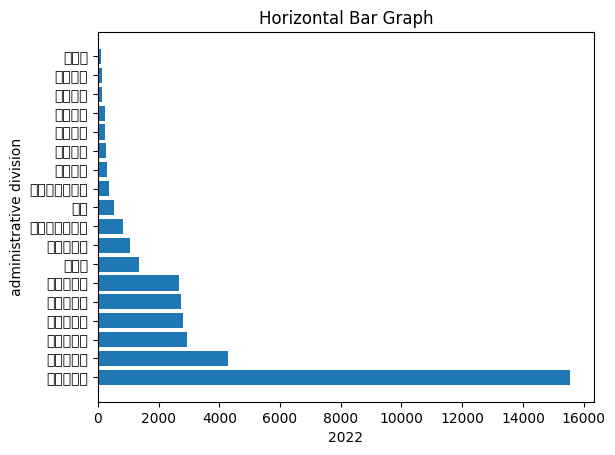

In [14]:
import matplotlib.pyplot as plt
# 그래프를 그리기 위한 데이터 추출
x_values = df_subset_sorted['2022']
y_values = df_subset_sorted['행정구역별']

# 수평 막대 그래프 그리기
plt.barh(y_values, x_values)

# 그래프 제목 설정
plt.title('Horizontal Bar Graph')

# x축 레이블 설정
plt.xlabel('2022')

# y축 레이블 설정
plt.ylabel('administrative division')

# 그래프 출력
plt.show()